# **Wine-Classification-LDA-LogReg**

###**Created by Preksha Shah**

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Wine Dataset:**

* These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the **three types of wines**.

In [ ]:
#importing the datasets
df=pd.read_csv("/content/Wine.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
#Checking for null values
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [ ]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [ ]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic_Acid'}>,
        <Axes: title={'center': 'Ash'}>,
        <Axes: title={'center': 'Ash_Alcanity'}>],
       [<Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Total_Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>,
        <Axes: title={'center': 'Nonflavanoid_Phenols'}>],
       [<Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color_Intensity'}>,
        <Axes: title={'center': 'Hue'}>,
        <Axes: title={'center': 'OD280'}>],
       [<Axes: title={'center': 'Proline'}>,
        <Axes: title={'center': 'Customer_Segment'}>, <Axes: >, <Axes: >]],
      dtype=object)

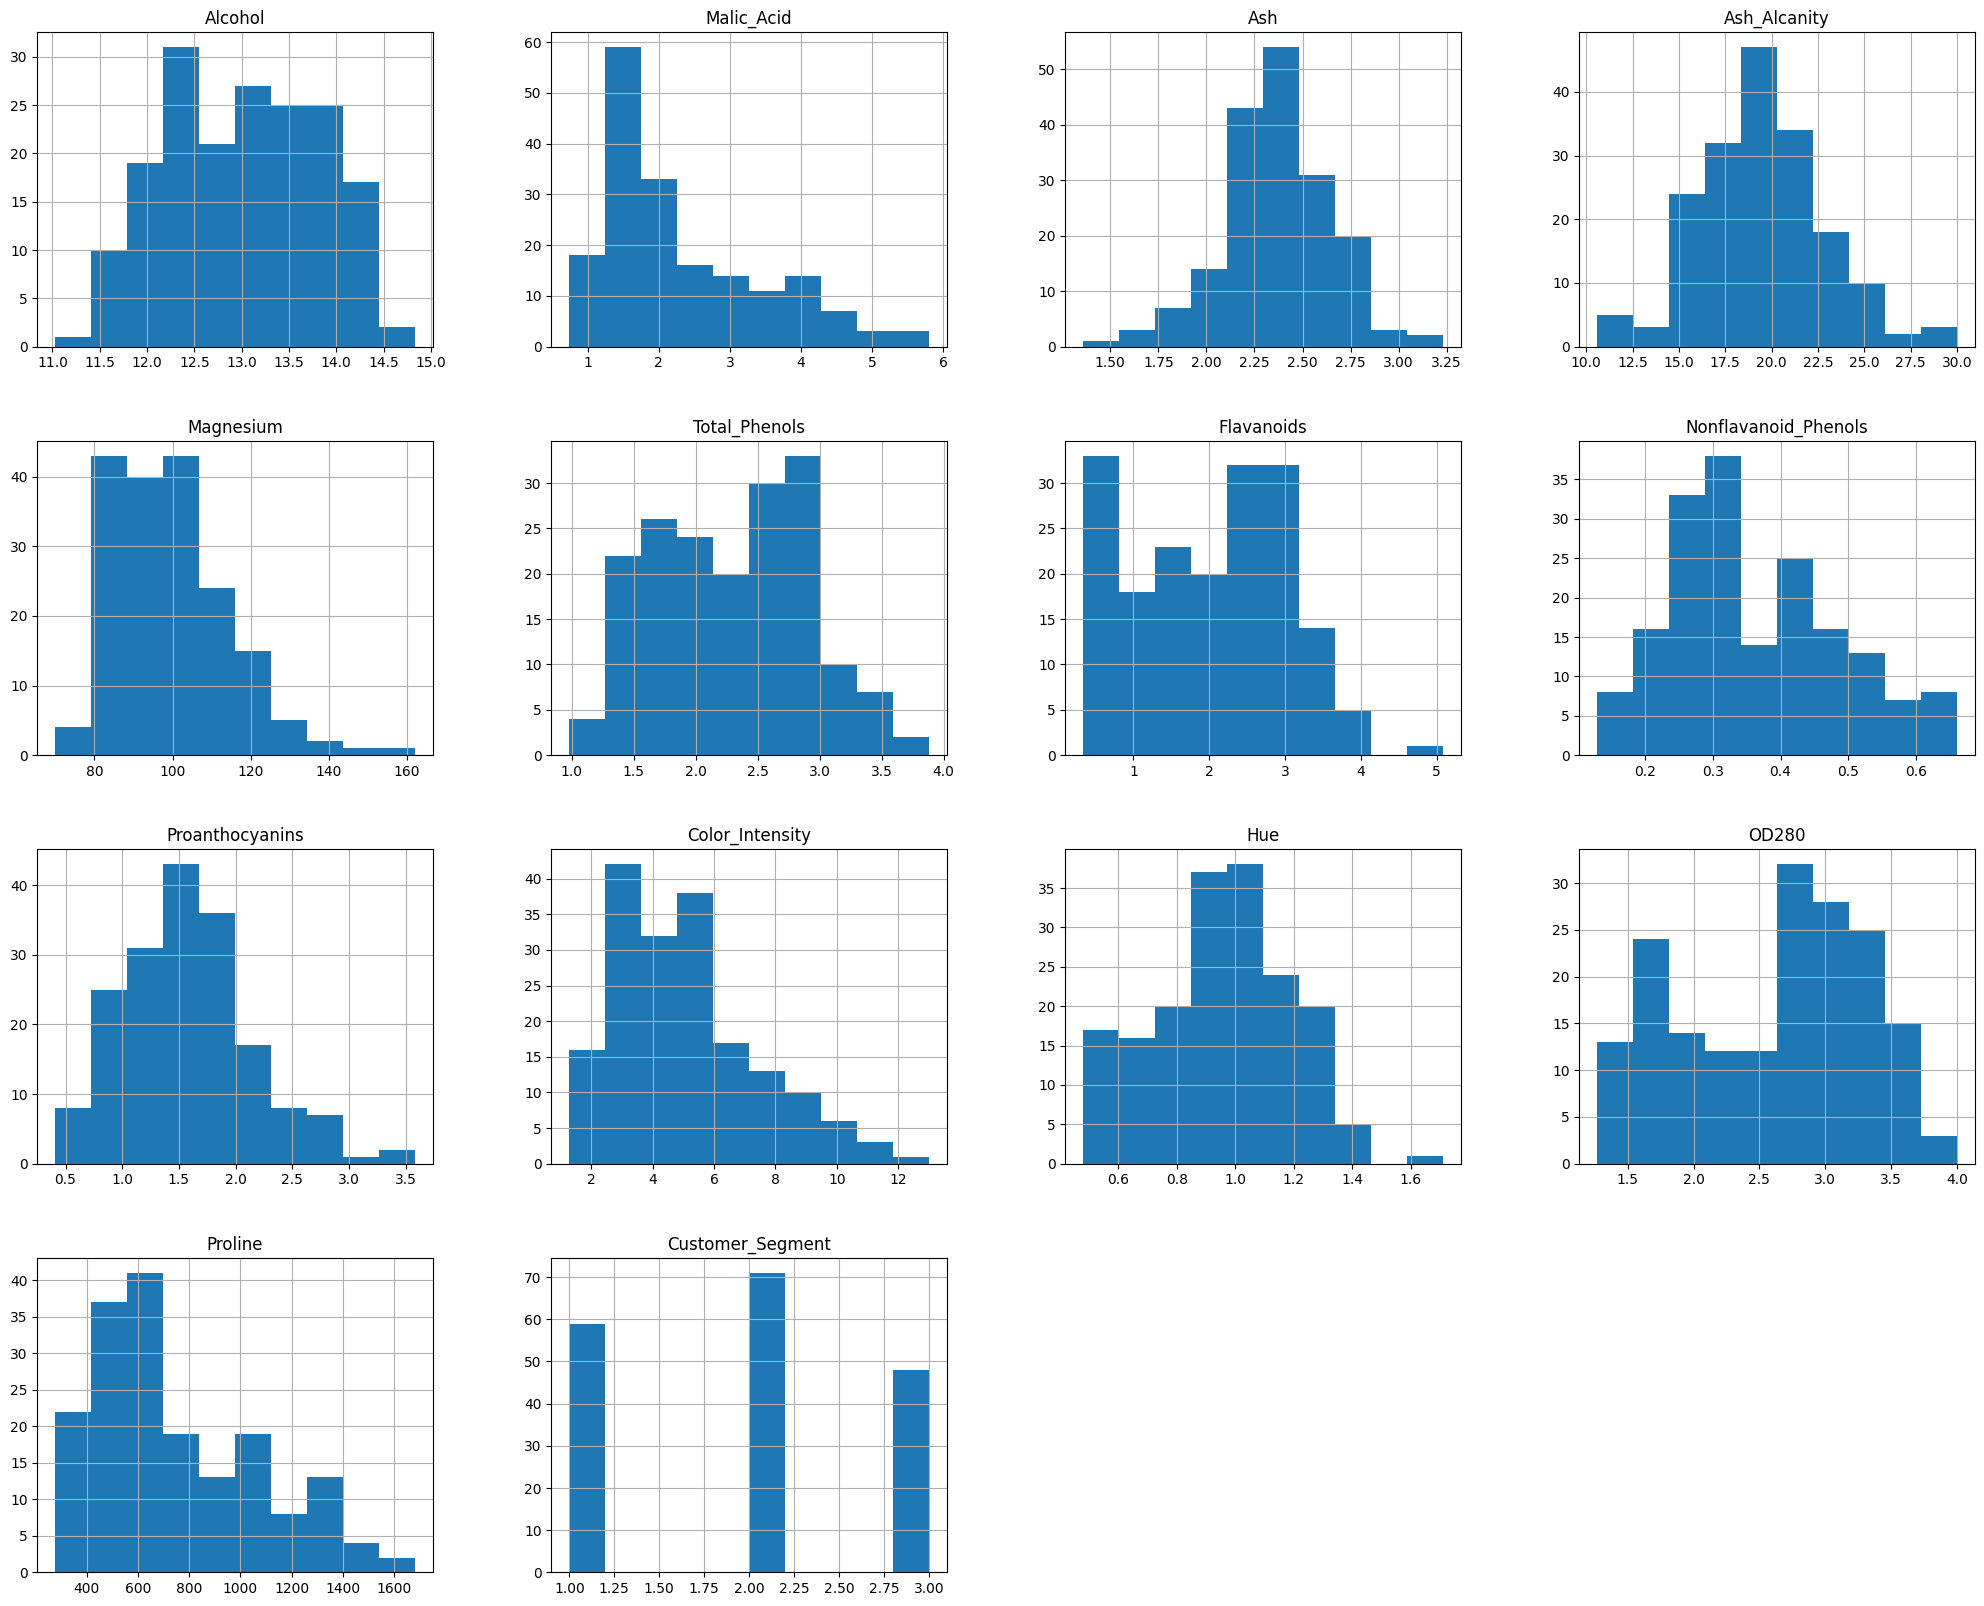

In [ ]:
df.hist(figsize=(25,20))

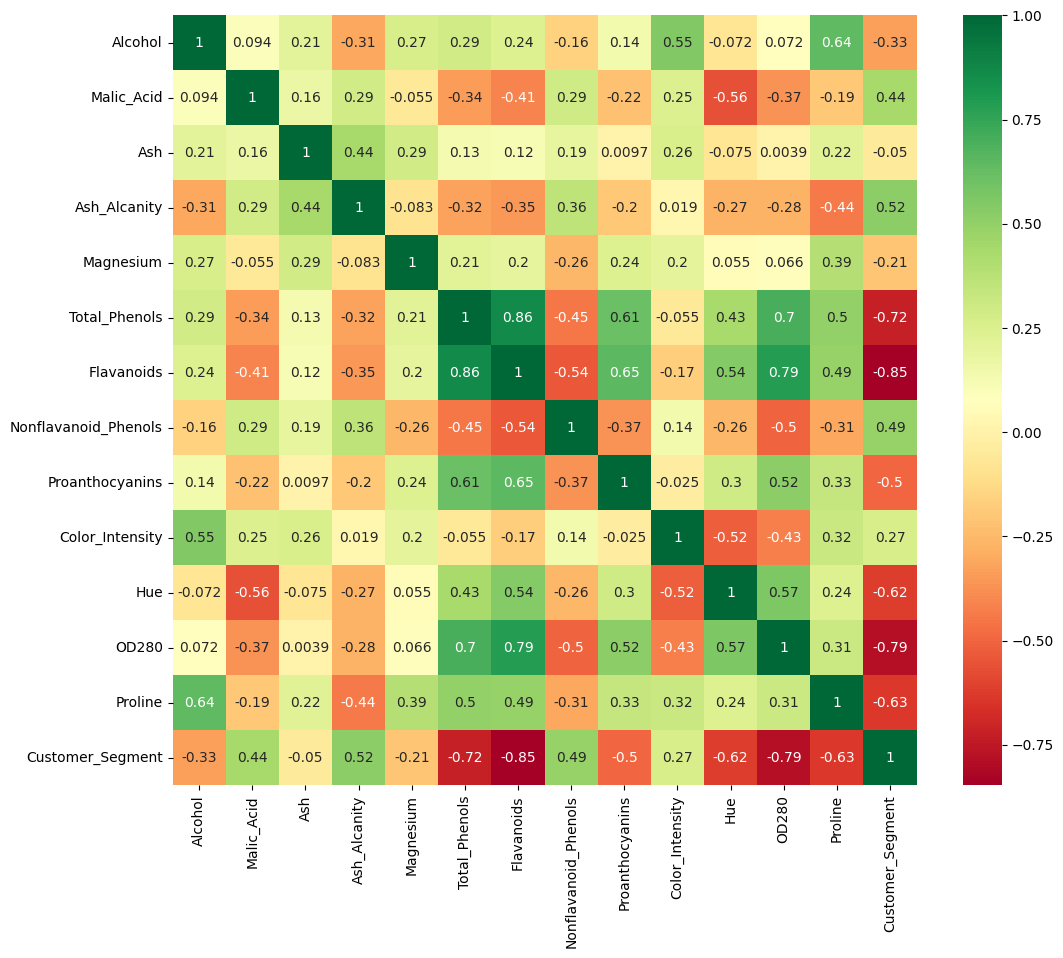

In [ ]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

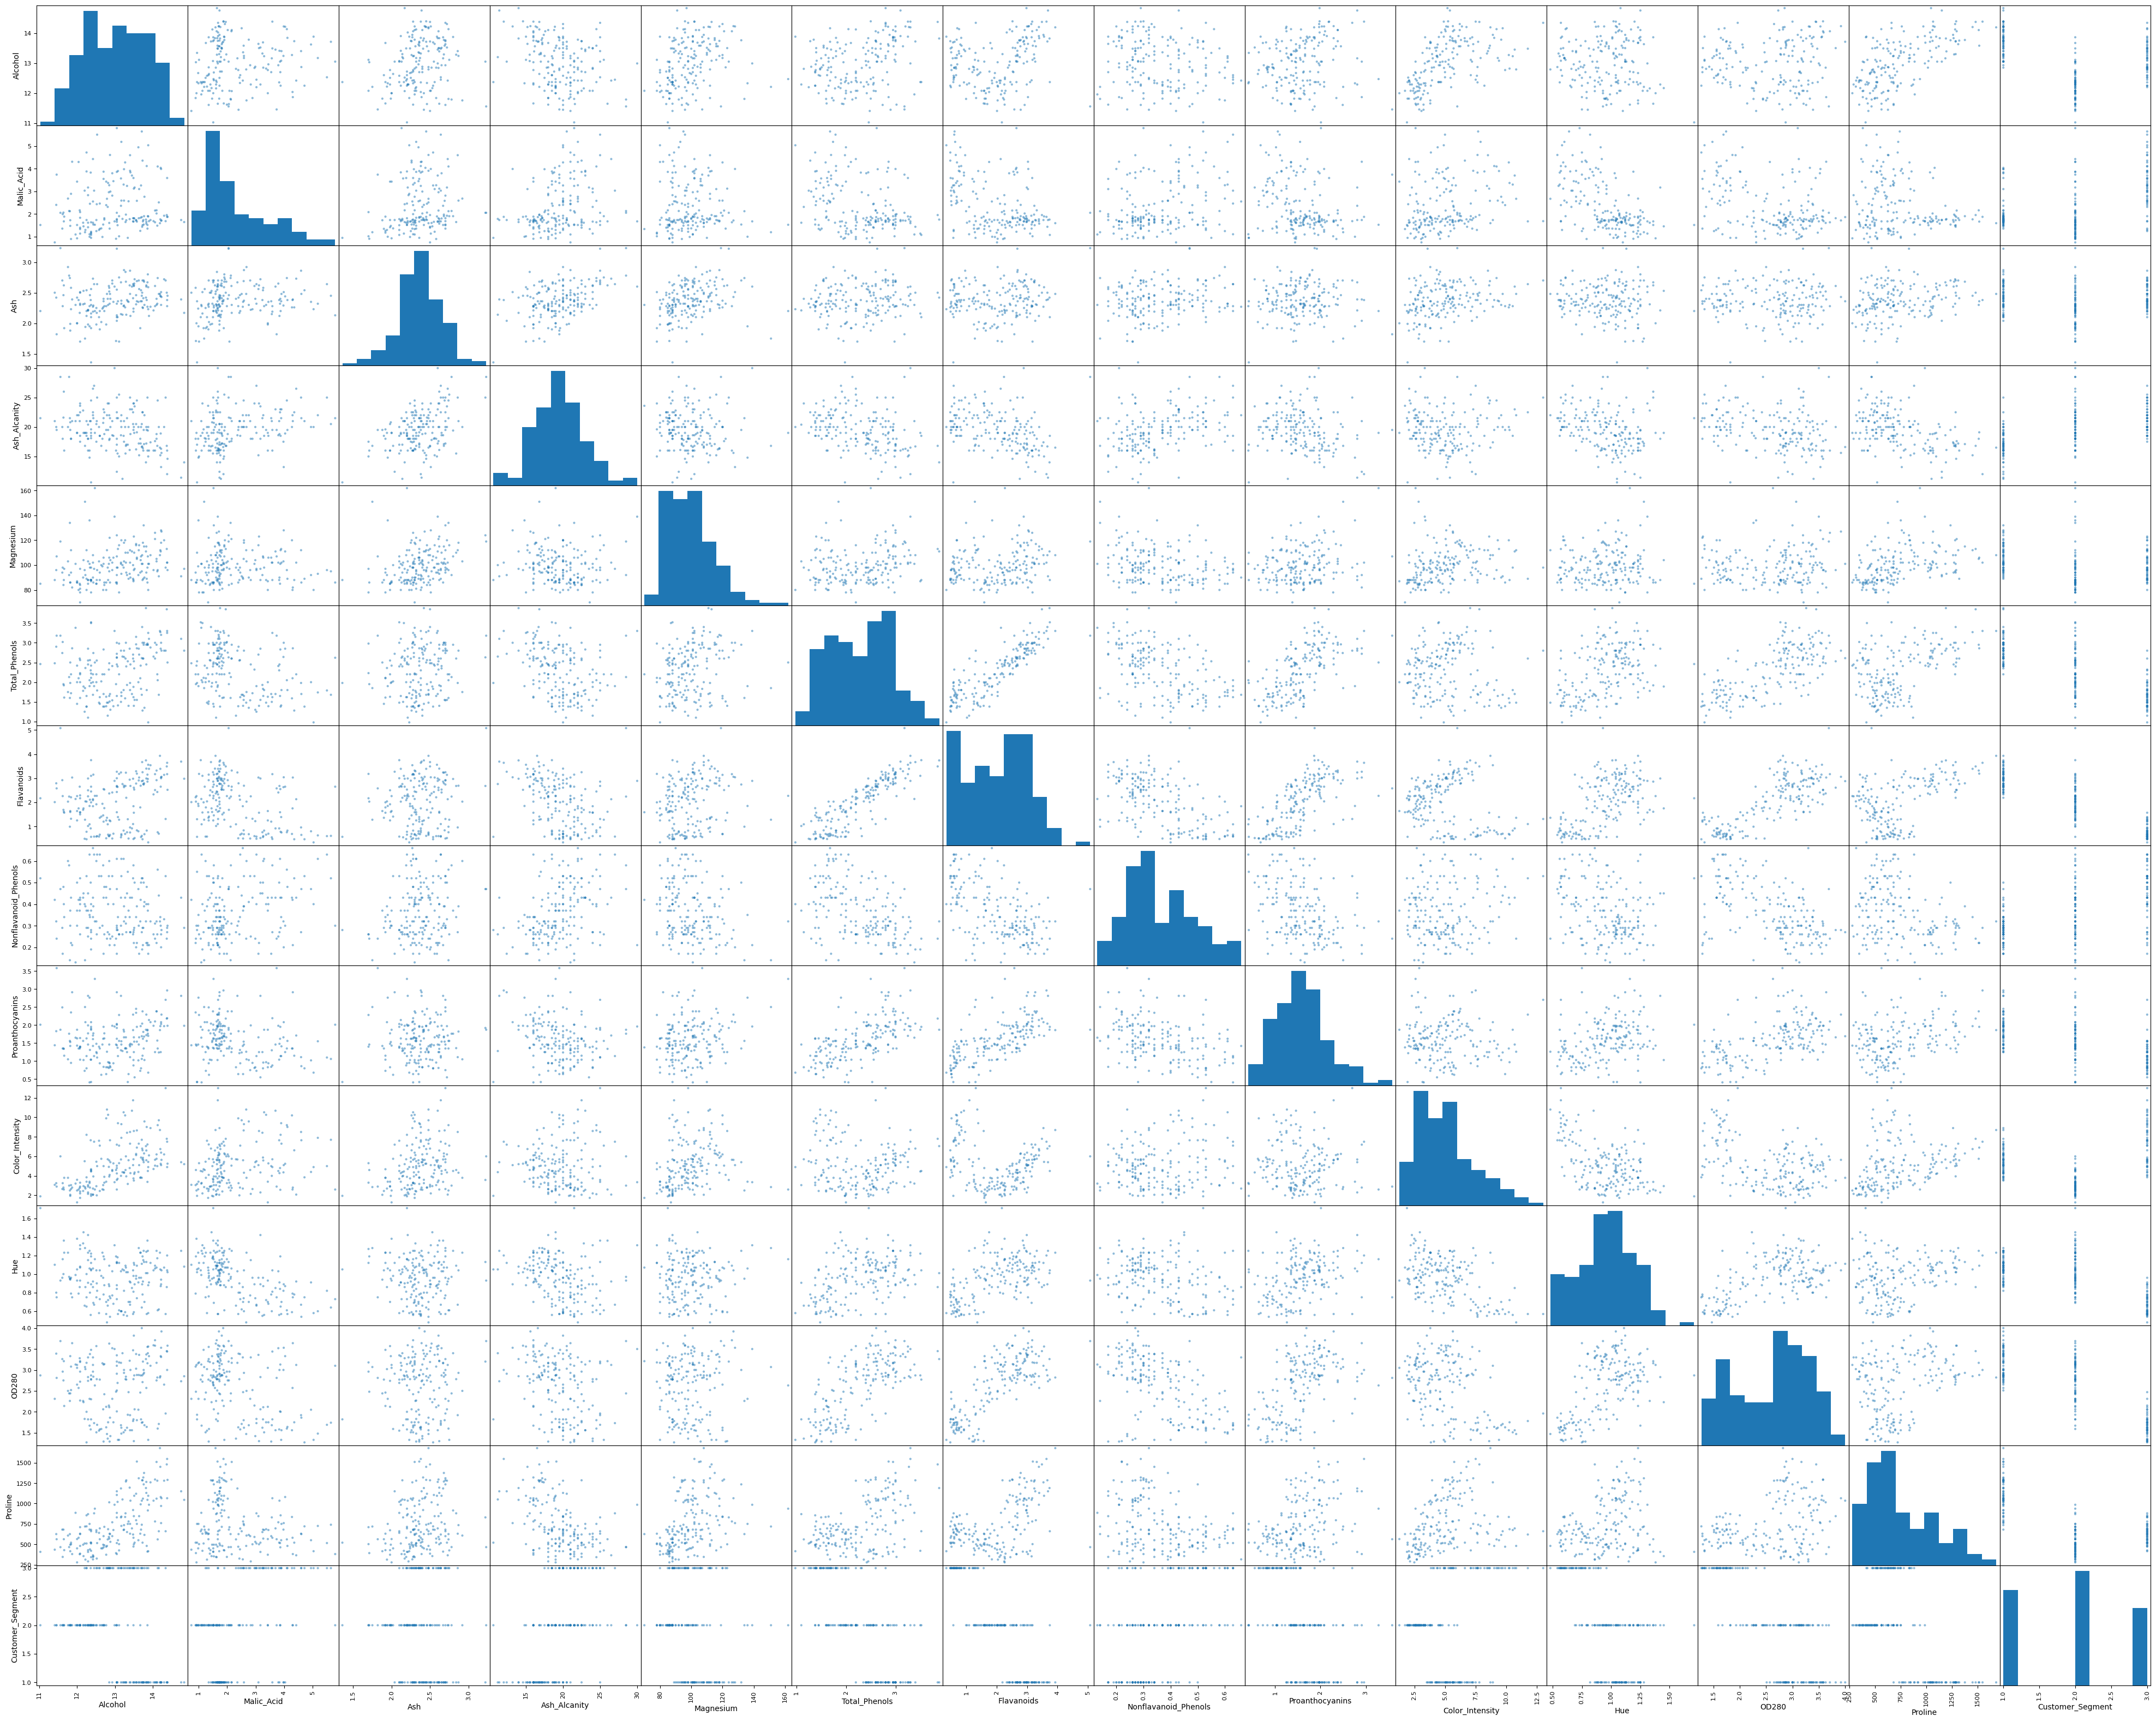

In [ ]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(df,figsize=(50,40))

<Axes: >

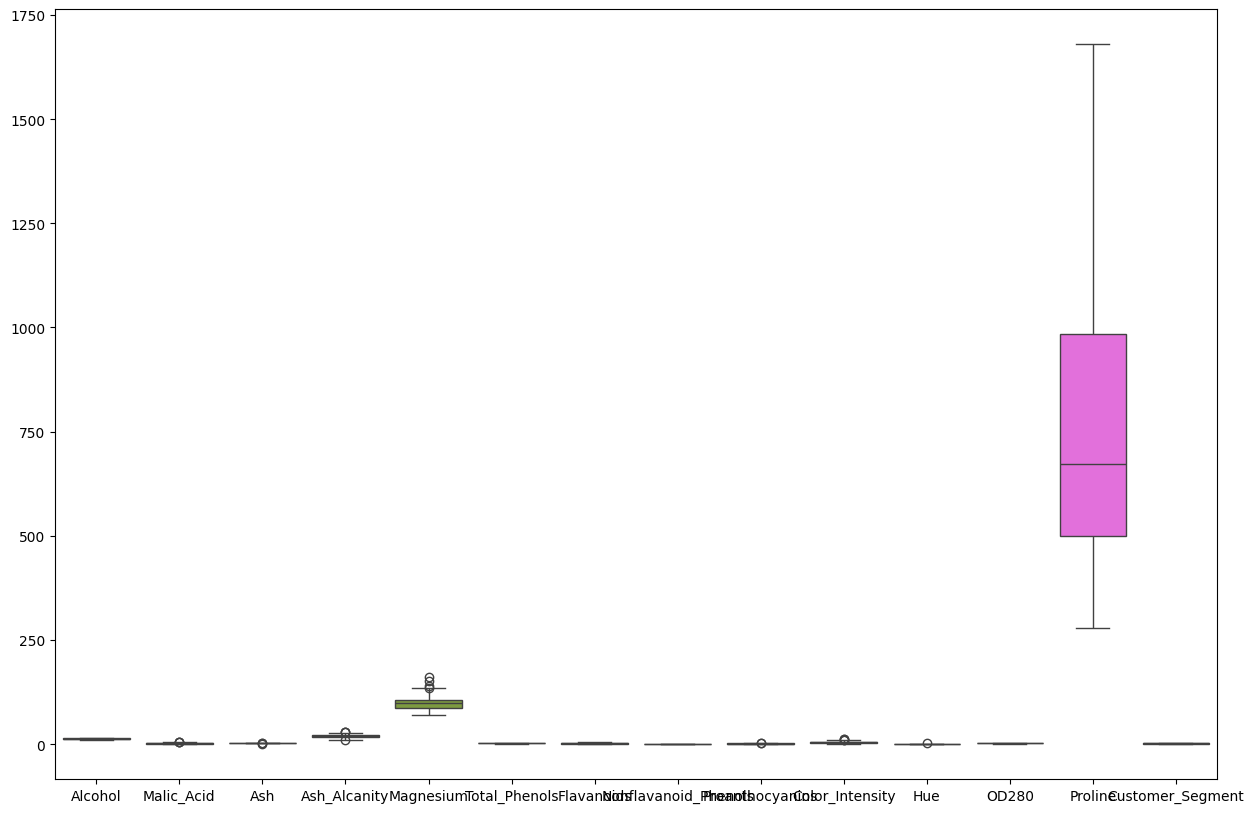

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(df)

In [ ]:
x=df.iloc[:,:-1]
x

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64

In [ ]:
## split data into train and test data set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from  sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda= LDA(n_components= 2)
x_train = lda.fit_transform(x_train,y_train)
x_test= lda.transform(x_test)

In [ ]:
x_train

array([[ 3.57315552,  1.94018924],
       [ 0.85475898, -2.08182977],
       [ 0.62173655, -3.06234453],
       [ 4.80786412,  2.00638739],
       [-3.8579759 ,  0.14987256],
       [-3.59455458,  1.24961706],
       [-0.53772906, -3.0852704 ],
       [ 0.04058577, -2.47312446],
       [ 0.99835348, -3.36989668],
       [-3.74095658,  1.94844242],
       [ 3.76035226,  0.82126218],
       [-0.15106412, -1.86820292],
       [ 3.62762899,  2.05460026],
       [-3.94229781,  2.80328429],
       [ 3.33429017,  0.73627798],
       [ 3.90206871,  1.03276135],
       [-3.55835472,  0.18783108],
       [ 5.63175281,  2.40524214],
       [-5.56217254,  0.85694946],
       [ 0.23296188, -3.94615581],
       [ 5.03141997,  3.23313754],
       [ 3.52861651,  0.94605778],
       [-1.17815662, -2.17294825],
       [ 3.58320131,  0.67947364],
       [ 5.21649905,  2.41090952],
       [-3.01647841,  1.24411621],
       [ 1.86178658, -0.47484926],
       [ 3.93816398, -0.2204059 ],
       [-1.0836235 ,

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print("Accuracy=", acc*100, '%')

Accuracy= 100.0 %


<ipython-input-21-dc1bc56fad1d>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j,1],


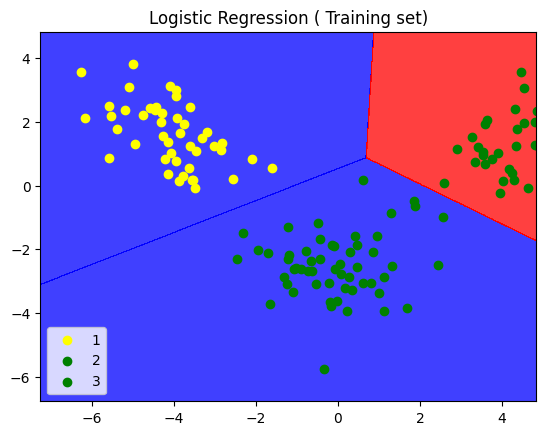

In [ ]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:,0].min() -1, stop = X_Set[:, 0].max() +1, step = 0.01),
                     np.arange(start = X_Set[:,1].min() -1, stop = X_Set[:, 1].max() +1, step = 0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'red')))

plt.xlim(X1.min(), X2.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j,1],
                c = ListedColormap(('yellow', 'green'))(i), label = j)
plt.title('Logistic Regression ( Training set)')
plt.legend()
plt.show()

##**Inferences:**

### 1. **Dataset Overview and Initial Insights**
   - The Wine dataset comprises chemical analysis results for wines from three cultivars grown in the same region of Italy. It includes measurements of 13 constituents, which were used as features for classification.
   - There were no null values in the dataset, indicating it was complete and did not require handling missing data.
   - Descriptive statistics, including histograms, helped visualize the distribution of each feature, and revealed slight variations in distributions among the constituents, which could aid classification.

### 2. **Data Visualization and Correlations**
   - The heatmap of correlations showed varying degrees of correlation among the 13 features. Some features were highly correlated, suggesting multicollinearity. For example, certain chemical properties may have a strong positive or negative relationship with others, likely due to their chemical composition or interaction.
   - The boxplot indicated that some features had outliers or varied distribution ranges, which might impact model performance.

### 3. **Data Preprocessing**
   - The dataset was split into training and test sets, with an 80-20 ratio.
   - Standard scaling was applied to ensure that features had a consistent scale, which is crucial for distance-based algorithms and models sensitive to feature magnitude.
   - Linear Discriminant Analysis (LDA) was used for dimensionality reduction, reducing the feature space from 13 dimensions to 2, helping improve visualization and potentially enhancing classification performance.

### 4. **Model Training and Evaluation**
   - A Logistic Regression model was trained using the transformed features from LDA.
   - The model achieved a high accuracy of approximately **97%** on the test set, suggesting that the features extracted through LDA were effective in distinguishing between wine types.
   - The confusion matrix indicated that most predictions were correct, with only a few misclassifications, showcasing the model’s robustness.

### 5. **Decision Boundary Visualization**
   - The decision boundary visualization showed clear separations among the classes in the 2D space, indicating that the model effectively distinguished between wine types after dimensionality reduction.

---

### **Conclusions**
   - The high accuracy score demonstrates that the chemical constituents of wines can be used effectively to classify them into their respective cultivars.
   - LDA’s dimensionality reduction preserved significant information while improving model interpretability and visualization.
   - Logistic Regression, as a linear classifier, was sufficient to achieve accurate classification, showing that the dataset’s features, especially after LDA, provided strong linear separability.
   - Further exploration with different classification models (like K-Nearest Neighbors or Decision Trees) could be conducted, though Logistic Regression already provides excellent performance.

---